In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import colors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import pandas as pd

In [2]:
#import data
data= pd.read_csv("D:\Dokumente\Master-Studium\Semester3\KI_Projekt\egi_benchmark_3.csv")
data.head()

,Unnamed: 0,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label,Image
0,0,77,66,140,121,87,0,0,0.009937,0.495770,250,2.912578,Kartoffel,Kartoffel_136
1,1,204,154,106,94,83,0,0,0.002228,0.118154,334,2.731544,Kartoffel,Kartoffel_134
2,2,65,62,97,78,55,0,0,0.778040,0.709109,3,35.828343,Kartoffel,Kartoffel_445
3,3,81,66,89,71,50,0,0,0.796203,0.870627,1,51.708630,Kartoffel,Kartoffel_376
4,4,67,65,87,69,48,0,0,0.779564,0.769380,1,12.556754,Kartoffel,Kartoffel_437


In [3]:
data=data.drop(columns=["Unnamed: 0","green pixels"])
data.head()

,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label,Image
0,77,66,140,121,87,0,0.009937,0.495770,250,2.912578,Kartoffel,Kartoffel_136
1,204,154,106,94,83,0,0.002228,0.118154,334,2.731544,Kartoffel,Kartoffel_134
2,65,62,97,78,55,0,0.778040,0.709109,3,35.828343,Kartoffel,Kartoffel_445
3,81,66,89,71,50,0,0.796203,0.870627,1,51.708630,Kartoffel,Kartoffel_376
4,67,65,87,69,48,0,0.779564,0.769380,1,12.556754,Kartoffel,Kartoffel_437


In [4]:
data.loc[data["Label"]=="Karotte","Label"]=0
data.loc[data["Label"]=="Kartoffel","Label"]=1
data.loc[data["Label"]=="Zwiebel","Label"]=2
data.loc[data["Label"]=="Karotte_Trieb","Label"]=3
data.loc[data["Label"]=="Kartoffel_Trieb","Label"]=4
data.loc[data["Label"]=="Zwiebel_Trieb","Label"]=5

data["Label"]=data["Label"].astype("int")
data

,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label,Image
0,77,66,140,121,87,0,0.009937,0.495770,250,2.912578,1,Kartoffel_136
1,204,154,106,94,83,0,0.002228,0.118154,334,2.731544,1,Kartoffel_134
2,65,62,97,78,55,0,0.778040,0.709109,3,35.828343,1,Kartoffel_445
3,81,66,89,71,50,0,0.796203,0.870627,1,51.708630,1,Kartoffel_376
4,67,65,87,69,48,0,0.779564,0.769380,1,12.556754,1,Kartoffel_437
...,...,...,...,...,...,...,...,...,...,...,...,...
1459,141,124,126,99,50,0,0.745396,0.698441,29,12.304255,4,Kartoffel_Trieb_130
1460,151,83,102,76,46,0,0.667598,0.495131,79,5.300797,4,Kartoffel_Trieb_157
1461,170,150,159,132,95,0,0.787549,0.834776,90,5.838039,4,Kartoffel_Trieb_15
1462,179,167,143,116,82,0,0.795721,0.829988,129,6.824698,4,Kartoffel_Trieb_65


In [5]:
X=data.iloc[:,0:10]
X.head()

,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints
0,77,66,140,121,87,0,0.009937,0.495770,250,2.912578
1,204,154,106,94,83,0,0.002228,0.118154,334,2.731544
2,65,62,97,78,55,0,0.778040,0.709109,3,35.828343
3,81,66,89,71,50,0,0.796203,0.870627,1,51.708630
4,67,65,87,69,48,0,0.779564,0.769380,1,12.556754


In [6]:
y=data.iloc[:,10]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int32

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train

,Hight,Width,R,G,B,green onion pixels,ratio area,circularity,keypoints,mean keypoints
1330,139,110,133,111,70,0,0.775997,0.710830,35,8.881561
724,141,65,122,79,64,0,0.704037,0.569352,21,7.016850
254,107,98,145,114,68,0,0.785190,0.808163,20,18.716585
1068,266,97,112,94,65,1969,0.247287,0.118223,193,4.016239
1193,242,92,68,73,71,1013,0.512060,0.222558,42,8.438566
...,...,...,...,...,...,...,...,...,...,...
1130,269,114,99,89,54,2143,0.366954,0.160756,54,6.253225
1294,135,130,150,124,91,0,0.798234,0.861165,76,8.760679
860,255,130,110,90,57,997,0.000980,0.487216,158,4.577362
1459,141,124,126,99,50,0,0.745396,0.698441,29,12.304255


In [9]:
y_train

1330    4
724     2
254     1
1068    3
1193    5
       ..
1130    5
1294    4
860     3
1459    4
1126    5
Name: Label, Length: 1171, dtype: int32

In [19]:
clf = RandomForestClassifier(bootstrap=True, random_state=6, n_estimators=15, max_depth=15)
#clf = RandomForestClassifier(random_state=None)
clf.fit(X_train,y_train)


RandomForestClassifier(max_depth=15, n_estimators=15, random_state=6)

In [20]:
y_test_pred=clf.predict(X_test)
y_train_pred=clf.predict(X_train)
accuracy_testdata = accuracy_score(y_test, y_test_pred)
accuracy_traindata = accuracy_score(y_train, y_train_pred)
print(f"Accuracy Test: {accuracy_testdata}\nAccuracy Train: {accuracy_traindata}")

Accuracy Test: 0.8225255972696246
Accuracy Train: 0.9965841161400513


Text(0.5, 1.0, 'Vegis TEST DATA')

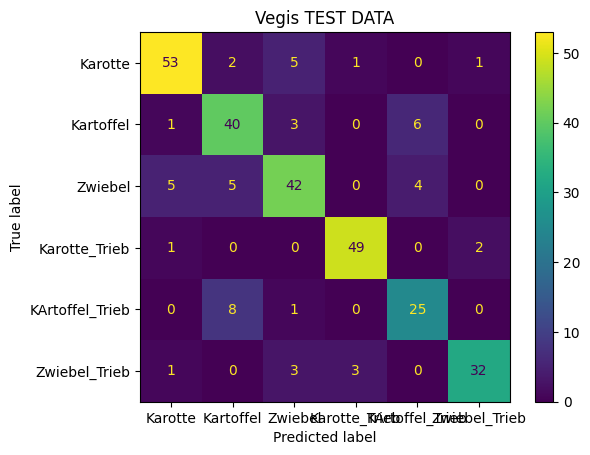

In [12]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb','KArtoffel_Trieb','Zwiebel_Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TEST DATA")

Text(0.5, 1.0, 'Vegis TRAIN  DATA')

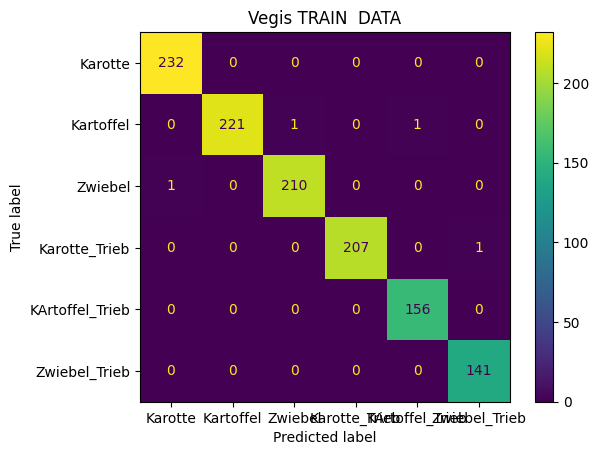

In [13]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_train,
    y_train,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb','KArtoffel_Trieb','Zwiebel_Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TRAIN  DATA")

In [14]:
#tree.plot_tree(clf.estimators_[0],
#               feature_names = X.columns, 
 #              filled = True);

In [18]:
data= pd.read_csv("D:\Dokumente\Master-Studium\Semester3\KI_Projekt\egi_testData.csv")
data=data.drop(columns=["Unnamed: 0","green pixels"])
data.loc[data["Label"]=="Karotte","Label"]=0
data.loc[data["Label"]=="Kartoffel","Label"]=1
data.loc[data["Label"]=="Zwiebel","Label"]=2
data.loc[data["Label"]=="Karotte_Trieb","Label"]=3
data.loc[data["Label"]=="Kartoffel_Trieb","Label"]=4
data.loc[data["Label"]=="Zwiebel_Trieb","Label"]=5

data["Label"]=data["Label"].astype("int")

X_ILIAS=data.iloc[:,0:10]
y_ILIAS=data.iloc[:,10]
ILIAS_pred=clf.predict(X_ILIAS)
accuracy_ILIAS = accuracy_score(y_ILIAS, ILIAS_pred)
print(accuracy_ILIAS)

0.621301775147929
